In [29]:
#Import packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import contextily as cx
import mplleaflet
import folium

In [28]:
# install new packages
import sys 
!pip install folium

     |████████████████████████████████| 94 kB 1.9 MB/s eta 0:00:011


In [3]:
# read in acoustic metadata, parse date columns
ccb = pd.read_csv("../Data/CCB Metadata.csv",
                 sep = ',',
                 encoding = 'utf-8',
                 parse_dates = ['deployDate', 'recoveryDate'])
ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000


In [4]:
# create separate fields for deployment day, month and year
ccb['depYear'] = ccb['deployDate'].dt.year

ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   c_recordOnDays            38 non-null     int64         
 1   c_uniqueUnitID            38 non-null     object        
 2   deployDate                38 non-null     datetime64[ns]
 3   deploymentDepth_Meters    30 non-null     float64       
 4   dutyCycle_Flag            38 non-null     object        
 5   latitudeDeployed_DecDeg   38 non-null     float64       
 6   longitudeDeployed_DecDeg  38 non-null     float64       
 7   recoveryDate              38 non-null     datetime64[ns]
 8   samplingRate_Hz           38 non-null     int64         
 9   depYear                   38 non-null     int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 3.1+ KB


In [5]:
# create geodataframe
geom = [Point(xy) for xy in zip(ccb['longitudeDeployed_DecDeg'], ccb['latitudeDeployed_DecDeg'])]
ccb_gdf = gpd.GeoDataFrame(ccb, geometry = geom, crs = 4269)

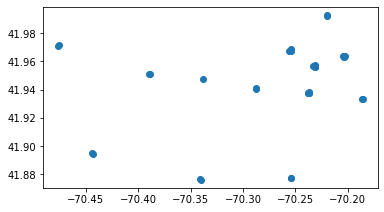

In [6]:
# quick plot
ccb_gdf.plot();

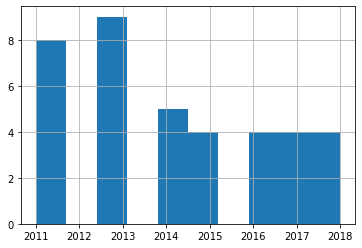

In [7]:
# distribution of deployment years
ccb_gdf['depYear'].hist(); # weird spacing..

In [25]:
# plot all ccb hydrophones, color by year
ccb_gdf.plot(    
    column = 'depYear',
    cmap = 'Dark2',
    legend = True,
    marker = '.',
    markersize = 30,
    alpha = 1,
    figsize = (12,4));

# show with leaflet
mplleaflet.show() # data must be in geographic projection

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

In [17]:
cx.providers.Esri.keys()

dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas'])

In [23]:
# set ccb_gdf to UTM zone 18N (26918)
ax = ccb_gdf.to_crs('EPSG:26918').plot(figsize=(9, 9))

# plot with basemap via contextily
cx.add_basemap(ax,source=cx.providers.Esri.WorldTopoMap)

# show with leaflet
#mplleaflet.show() >> 

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

### Plot with folium

In [31]:
ccb_gdf.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,geometry
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,POINT (-70.28800 41.94120)
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,POINT (-70.25400 41.87710)
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,POINT (-70.44390 41.89480)
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,POINT (-70.18590 41.93340)
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,POINT (-70.39010 41.95080)


In [32]:
# specify center of map (cape cod bay)
medianLat = ccb_gdf['latitudeDeployed_DecDeg'].median()
medianLng = ccb_gdf['longitudeDeployed_DecDeg'].median()
print (medianLat,medianLng)

41.9563 -70.2378205


In [41]:
# create map object called m
m = folium.Map(location = [medianLat,medianLng],
              zoom_start = 9)

m

In [49]:
# big marker
bigMarker = folium.CircleMarker(location = [medianLat,medianLng],
                               color = 'blue',
                               fill = True,
                               fill_opacity = 0.2,
                               radius = 20,
                               tooltip = 'Map Center')

bigMarker.add_to(m)
m

In [51]:
ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,geometry
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,POINT (-70.28800 41.94120)
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,POINT (-70.25400 41.87710)
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,POINT (-70.44390 41.89480)
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,POINT (-70.18590 41.93340)
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,POINT (-70.39010 41.95080)


In [52]:
# recreate map to clear circle marker
m = folium.Map(location = [medianLat,medianLng],
              zoom_start = 8)

# loop through points, add to map
for row in ccb.itertuples():
    # identify attributes we need
    lat = row.latitudeDeployed_DecDeg
    lon = row.longitudeDeployed_DecDeg
    depYear = row.depYear
    # create marker object
    folium.CircleMarker(location=[lat,lon],
                       color = 'blue',
                       fill = True,
                       fill_opacity = 0.6,
                       radius = 3,
                       tooltip = depYear
                       ).add_to(m)
m

In [53]:
ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,geometry
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,POINT (-70.28800 41.94120)
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,POINT (-70.25400 41.87710)
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,POINT (-70.44390 41.89480)
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,POINT (-70.18590 41.93340)
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,POINT (-70.39010 41.95080)


In [58]:
# recreate map to clear circle marker
map_a = folium.Map(location = [medianLat,medianLng],
              zoom_start = 8)



# loop through points, add to map
for row in ccb.itertuples():
    # identify attributes we need
    lat = row.latitudeDeployed_DecDeg
    lon = row.longitudeDeployed_DecDeg
    depYear = row.depYear
    # create marker object
    folium.CircleMarker(location=[lat,lon],
                       color = 'red',
                       fill = False,
                       radius = 2,
                       tooltip = depYear
                       ).add_to(m)
m

In [ ]:
# example
# https://stackoverflow.com/questions/61263787/folium-featuregroup-in-python
    
mapa = folium.Map(location=[35.11567262307692,-89.97423444615382], zoom_start=12,
           tiles='Stamen Terrain')

for grp_name, df_grp in df_addresses.groupby('Group'):
    feature_group = folium.FeatureGroup(grp_name)
    for row in df_grp.itertuples():
        folium.Marker(location=[row.Latitude, row.Longitude]).add_to(feature_group)
    feature_group.add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa